In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import preprocessing

# READIND DATA

In [4]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/Real_Estate.xlsx')
display(data)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# CHECKING FOR MISSING VALUES

In [5]:
for col in data.columns.values:
    
    # Getting list of unique values in each column
    unique_list = pd.unique(data[col])

    print("Datatype of {} is: ".format(col), data[col].dtype)
    print("Number of unique values for {} are: ".format(col), len(unique_list))

    # Converting a column to a boolean array checking for null values
    is_null = pd.isnull(data[col])

    # Calculating total null values
    total_null = np.sum(is_null)

    print("Number of missing entries for {} are: ".format(col), total_null)
    print("Number of non-missing entries for {} are: ".format(col), data[col].shape[0] - total_null)

    print("---------------")

Datatype of No is:  int64
Number of unique values for No are:  414
Number of missing entries for No are:  0
Number of non-missing entries for No are:  414
---------------
Datatype of X1 transaction date is:  float64
Number of unique values for X1 transaction date are:  12
Number of missing entries for X1 transaction date are:  0
Number of non-missing entries for X1 transaction date are:  414
---------------
Datatype of X2 house age is:  float64
Number of unique values for X2 house age are:  236
Number of missing entries for X2 house age are:  0
Number of non-missing entries for X2 house age are:  414
---------------
Datatype of X3 distance to the nearest MRT station is:  float64
Number of unique values for X3 distance to the nearest MRT station are:  259
Number of missing entries for X3 distance to the nearest MRT station are:  0
Number of non-missing entries for X3 distance to the nearest MRT station are:  414
---------------
Datatype of X4 number of convenience stores is:  int64
Numb

# CORRELATION MATRIX

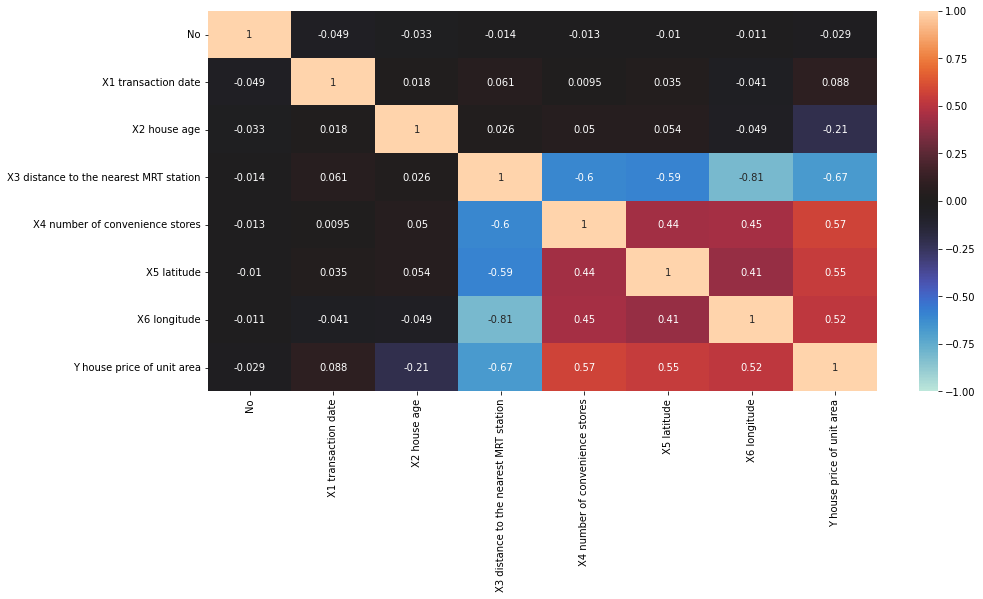

In [6]:
plt.figure(figsize = (15, 7))

# Calculating correlation between all columns
var_corr = data.corr()

# Plotting correlation heatmap
sns.heatmap(var_corr, xticklabels = var_corr.columns, yticklabels = var_corr.columns, annot = True, vmin=-1, vmax=1, center= 0)

# PRE-PROCESSING

In [8]:
# Extracting the label column
Y = data['Y house price of unit area']

# Dropping the label column from the main dataset
data = data.drop(['Y house price of unit area','No'], axis = 1)
display(data)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [9]:
# Converting the data into numpy arrays
X = np.array(data)
Y = np.array(Y)

# Reshaping the label array
Y = np.reshape(Y, (Y.shape[0], 1))

print(X.shape)
print(Y.shape)

(414, 6)
(414, 1)


# TRAIN-TEST SPLIT FUNCTION

In [18]:
# Splitting the data into train and test sets
def data_split(test_split = 0.2):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_split, shuffle = True)
    return X_train, X_test, Y_train, Y_test

# RIDGE REGRESSION FUNCTION

In [11]:
# Function to carry out ridge regression with regularization parameter alpha
def ridge_reg(X, Y, alpha):
    
    # Adding a column of ones to account for the constant
    bias_vector = np.ones((X.shape[0], 1))
    X_new = np.concatenate((bias_vector, X), axis = 1)
    
    # Creating an identity matrix with same dimensions as X_new
    I = np.identity(X_new.shape[1])
    I[0][0] = 0

    # Computing betas using the formula for ridge regression
    beta = np.linalg.multi_dot((np.linalg.inv(np.dot(np.transpose(X_new), X_new) + alpha*I), np.transpose(X_new), Y))
    return beta

# LASSO REGRESSION FUNCTION

In [12]:
# Function to carry out lasso regression with regularization parameter alpha
def lasso_reg(X, Y, alpha):

    # Creating an instance of LASSO optimiser
    clf = Lasso(alpha=alpha)

    # Fitting the data to get the best line
    clf.fit(X, Y)
    
    coef = clf.coef_
    intercept = clf.intercept_

    coef = np.reshape(coef, (coef.shape[0], 1))
    intercept = np.reshape(intercept, (intercept.shape[0], 1))

    return coef, intercept

# ERROR FUNCTION

In [13]:
# To calculate the squared error between predicted and actual values
def error(y_pred, y_actual):
    
    error_vector = y_actual - y_pred
    
    # Computing using the formula for MSE
    MSE = np.dot(np.transpose(error_vector), error_vector)*(1/float(len(error_vector)))
    return MSE

# COEFFICIENT OF DETERMINATION FUNCTION

In [14]:
# To calculate the coefficient of determinaiton
def coef_det(y_pred, y_actual):

    # Creating an array with elements as average Y values
    y_mean = np.mean(y_actual)*np.ones((y_actual.shape[0], 1))
    
    # Deviation from mean explained by model
    model_exp = y_pred - y_mean
    SSM = np.dot(np.transpose(model_exp), model_exp)
    
    # Actual deviation from mean
    total_exp = y_actual - y_mean
    SST = np.dot(np.transpose(total_exp), total_exp)

    # Using formula for coefficient of determinaiton
    return SSM[0][0]/SST[0][0]

# SIMPLE LINEAR REGRESSION

In [30]:
# Training a simple linear regression model with alpha = 0
X_train, X_test, Y_train, Y_test = data_split()
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

beta = ridge_reg(X_train, Y_train, alpha = 0)
beta = np.reshape(beta, (7, 1))

print(f"Coefficients corresponding to different features are: {beta[1:]}")
print(f"Intercept corresponding to the trained model is: {beta[0]}")

Coefficients corresponding to different features are: [[ 1.3761333 ]
 [-2.81876646]
 [-6.35681955]
 [ 2.96098273]
 [ 2.35152801]
 [-0.34864349]]
Intercept corresponding to the trained model is: [38.06918429]


In [34]:

# Adding a column of ones to account for the constant
bias_vector = np.ones((X_test.shape[0], 1))
X_test_new = np.concatenate((bias_vector, X_test), axis = 1)

# Using the calculated beta values to make predictions on the test dataset
Y_test_pred = np.dot(X_test_new, beta)
print(f"Predicted prices for houses in the test dataset are: {Y_test_pred}")

Predicted prices for houses in the test dataset are: [[43.89382639]
 [51.08738021]
 [ 5.25110668]
 [46.1804993 ]
 [44.94097954]
 [38.64529422]
 [41.12261286]
 [48.05024691]
 [30.05017992]
 [49.46547535]
 [46.09589124]
 [35.01177367]
 [44.37040148]
 [10.78911978]
 [50.07901951]
 [33.30273175]
 [50.76755673]
 [46.02894899]
 [40.62154926]
 [54.65066208]
 [14.34126555]
 [39.80983808]
 [29.47185375]
 [35.22699199]
 [52.68268757]
 [11.03990341]
 [32.18890042]
 [45.66332886]
 [42.66756533]
 [26.15905273]
 [42.14652034]
 [24.97923063]
 [48.05024691]
 [40.40984016]
 [37.7380989 ]
 [40.27955802]
 [40.03899912]
 [48.34994714]
 [47.329578  ]
 [40.77677318]
 [29.11461496]
 [47.93727456]
 [31.77733787]
 [30.42959588]
 [51.53360887]
 [33.68208443]
 [27.6305113 ]
 [35.61001806]
 [32.3711488 ]
 [31.50565726]
 [35.61001806]
 [40.84364105]
 [50.35232013]
 [46.19585485]
 [30.12659328]
 [ 6.84284037]
 [34.21205788]
 [30.80877831]
 [35.04684411]
 [45.05051216]
 [27.59446061]
 [24.28484287]
 [30.50801822]
 [

In [37]:
# Calculating MSE Loss for the test dataset
loss = error(Y_test_pred, Y_test)
print(f"The Mean Square Error Loss for the simple linear regression model is: {loss[0][0]}")

# Calculating coefficient of determination for the test dataset
r_squared = coef_det(Y_test_pred, Y_test)
print(f"The coefficient of determination for the simple linear regression model is: {r_squared}")

The Mean Square Error Loss for the simple linear regression model is: 102.4657748027653
The coefficient of determination for the simple linear regression model is: 0.5892062673214118


# Simple Linear Regression For Different Train-Test Splits

In [38]:
test_splits = [0.4, 0.3, 0.1]

for test_split in test_splits:
    
    X_train, X_test, Y_train, Y_test = data_split(test_split = test_split)
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)

    beta = ridge_reg(X_train, Y_train, alpha = 0)
    beta = np.reshape(beta, (7, 1))

    print(f"Test size: {test_split}")
    print(f"Coefficients corresponding to different features are: {beta[1:]}")
    print(f"Intercept corresponding to the trained model is: {beta[0]}")

    # Adding a column of ones to account for the constant
    bias_vector = np.ones((X_test.shape[0], 1))
    X_test_new = np.concatenate((bias_vector, X_test), axis = 1)

    Y_test_pred = np.dot(X_test_new, beta)
    print(f"Predicted prices for houses in the test dataset are: {Y_test_pred}")

    # Calculating MSE Loss for the test dataset
    loss = error(Y_test_pred, Y_test)
    print(f"The Mean Square Error Loss for the simple linear regression model is: {loss[0][0]}")

    # Calculating coefficient of determination for the test dataset
    r_squared = coef_det(Y_test_pred, Y_test)
    print(f"The coefficient of determination for the simple linear regression model is: {r_squared}")
    print("---------------------")

Test size: 0.4
Coefficients corresponding to different features are: [[ 1.70843953]
 [-3.1143345 ]
 [-7.05217409]
 [ 3.11620579]
 [ 2.36941102]
 [-0.94433229]]
Intercept corresponding to the trained model is: [38.62096774]
Predicted prices for houses in the test dataset are: [[37.80709878]
 [44.97015461]
 [48.53623745]
 [47.43911639]
 [46.32841493]
 [49.30454386]
 [32.33869603]
 [43.95388042]
 [32.82141387]
 [34.39351166]
 [44.81390742]
 [55.81136858]
 [34.4816898 ]
 [45.404708  ]
 [26.86964538]
 [26.4192845 ]
 [39.56486186]
 [31.87410093]
 [46.4826157 ]
 [46.98983489]
 [46.88133091]
 [42.908371  ]
 [17.39221269]
 [44.06817895]
 [47.28236186]
 [45.04562069]
 [45.47298451]
 [44.87939335]
 [15.84429078]
 [35.0488173 ]
 [33.39392613]
 [53.39387122]
 [31.28462269]
 [46.0314054 ]
 [47.39777897]
 [39.19898817]
 [37.30017023]
 [43.26024207]
 [39.1815867 ]
 [38.76809852]
 [41.74946996]
 [47.61221874]
 [35.87931675]
 [32.87785598]
 [33.78867467]
 [38.77385838]
 [41.32510926]
 [48.27296446]
 [46

# Ridge and LASSO Regression For Different Train-Test Splits

In [43]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

for test_split in test_splits:
    
    for alpha in alphas:

        print(f"Test split value: {test_split}")
        print(f"Alpha (regularization parameter) value: {alpha}")

        X_train, X_test, Y_train, Y_test = data_split(test_split = test_split)
        X_train = preprocessing.scale(X_train)
        X_test = preprocessing.scale(X_test)

        # Carrying out ridge regression on the train dataset
        beta = ridge_reg(X_train, Y_train, alpha = alpha)
        beta = np.reshape(beta, (7, 1))

        # Adding a column of ones to account for the constant
        bias_vector = np.ones((X_test.shape[0], 1))
        X_test_new = np.concatenate((bias_vector, X_test), axis = 1)
        Y_test_pred = np.dot(X_test_new, beta)
        
        # Calculating MSE Loss for the test dataset
        loss = error(Y_test_pred, Y_test)
        print(f"The Mean Square Error Loss for the ridge regression model is: {loss[0][0]}")

        # Calculating coefficient of determination for the test dataset
        r_squared = coef_det(Y_test_pred, Y_test)
        print(f"The coefficient of determination for the ridge regression model is: {r_squared}")
        print("..................................................")

        # Carrying out LASSO regression on the train dataset
        coef, intercept = lasso_reg(X_train, Y_train, alpha)

        intercept_vector = intercept*np.ones((X_test.shape[0], 1))
        Y_test_pred = np.dot(X_test, coef) + intercept_vector

        # Calculating MSE Loss for the test dataset
        loss = error(Y_test_pred, Y_test)
        print(f"The Mean Square Error Loss for the LASSO regression model is: {loss[0][0]}")

        # Calculating coefficient of determination for the test dataset
        r_squared = coef_det(Y_test_pred, Y_test)
        print(f"The coefficient of determination for the LASSO regression model is: {r_squared}")
        print("---------------------------------------------------------")

Test split value: 0.4
Alpha (regularization parameter) value: 0.001
The Mean Square Error Loss for the ridge regression model is: 107.13850416900345
The coefficient of determination for the ridge regression model is: 0.47569546074051544
..................................................
The Mean Square Error Loss for the LASSO regression model is: 107.13712469831002
The coefficient of determination for the LASSO regression model is: 0.4755528602412403
---------------------------------------------------------
Test split value: 0.4
Alpha (regularization parameter) value: 0.005
The Mean Square Error Loss for the ridge regression model is: 69.34238384048874
The coefficient of determination for the ridge regression model is: 0.6279991628224907
..................................................
The Mean Square Error Loss for the LASSO regression model is: 69.3120876674315
The coefficient of determination for the LASSO regression model is: 0.6272411275237632
----------------------------------